In [1]:
# import libraries
import numpy as np
import scipy.stats as stats
import pandas as pd

import matplotlib.pyplot as plt

# define global figure properties
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

# Exe 1

In [2]:
# parameters
samplesizes = np.arange(50,1001,step=50)
stdevs = np.linspace(.1,7,41)

# initialization
CIs = np.zeros((len(samplesizes),len(stdevs)))

# experiment
for ni,N in enumerate(samplesizes):
  for si,s in enumerate(stdevs):

    # SEM
    sem = s/np.sqrt(N)

    # CI
    CIs[ni,si] = 2*stats.t.interval(.95,N-1,loc=0,scale=sem)[1]

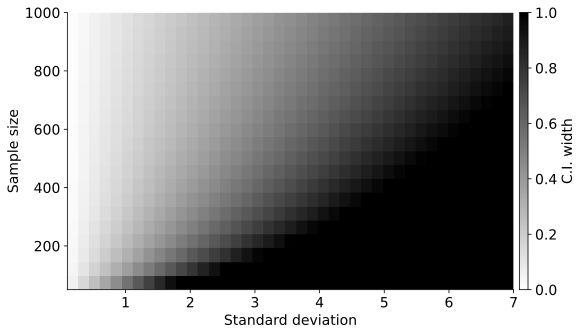

In [3]:
# plot 
fig,ax = plt.subplots(1,figsize=(8,5))
cax = ax.imshow(CIs,origin='lower',aspect='auto',vmin=0,vmax=1,cmap='gray_r',
          extent=[stdevs[0],stdevs[-1],samplesizes[0],samplesizes[-1]])
ax.set(xlabel='Standard deviation',ylabel='Sample size')

# colorbar
cbar_ax = fig.add_axes([.91,.11,.015,.77])
cbar = plt.colorbar(cax,cax=cbar_ax,label='C.I. width')

# display the figure
plt.show()